<a href="https://colab.research.google.com/github/sarasabino/Accident_Rate_Project/blob/main/Src/Notebooks/01_Exploratorio_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory of accident data

In [1]:
! cp /content/drive/MyDrive/'Colab Notebooks'/'TFM Accidentabilidad'/Data/HS_Accidentabilidad.csv .

In [2]:
import pandas as pd

accidentabilidad = pd.read_csv('HS_Accidentabilidad.csv', sep=';')

In [3]:
accidentabilidad.head()

,ID,- DATOS DEL SUCESO -,Codigo accidentado,Fecha introduccion datos,Fecha accidente,Año,Codigo fecha accidente,Planta,Código empleado,Supervisor,Puesto habitual de trabajo,Puesto habitual de trabajo - Cerrado,MOI o MOD,La estaba desempeñando,"En caso negativo, indicar qué estaba desempeñando",Edad,Género,Turno,Numero personas implicadas,Llevaba EPIs puestos,Hora,Hora jornada,Tipo trabajador,"En caso de ser ajeno, indicar empresa",Lugar o seccion accidente,Línea de producción,Tarea que estaba realizando,Cumplimiento Instruccion de Seguridad,¿Se ha incumplido alguna de las normas o instrucciones existentes y explicadas?,"En caso de incumplimiento, comentarios:","En caso negativo, indicar la razon",Experiencia en puesto,Fecha ultima formacion completa sobre instrucciones en el puesto,Condicion peligrosa,Forma de producirse,Factores de peligro,Acto inseguro,Naturaleza de lesion,- FORMA EN QUE SE PRODUJO -,Descripción supervisor,...,Responsable de Departamento,Nombre de Responsable,Fecha cierre informe,- VALORACIÓN DE LOS HECHOS -,Probabilidad de repeticion del suceso,Gravedad potencial,Podría haberse dado otro riesgo en estas circunstancias,- MEDIDAS DE CONTROL -,Posibilidad de este suceso detectada en la evaluación de riesgos,Estaban contempladas las medidas preventivas en la Instruccion de Seguridad,Los implicados conocian la existencia del riesgo y las medidas a adoptar,"Se habian cumplido las normas establecidas, en caso de estar definidas",- PROPUESTA DE ACCIONES -,Estas acciones pueden añadir riesgos a los ya existentes,"1 En caso afirmativo, cual es",Se abre NC como consecuencia de esta investigacion,"2 En caso afirmativo, cual es",Requiere revision de Evaluacion de Riesgos,"3 En caso afirmativo, cual es",Requiere revision de alguna Instruccion de Seguridad,"4 En caso afirmativo, cual es",Requiere incorporar algun aspecto en el check list de Inspecciones,"5 En caso afirmativo, cual es",Requiere amonestacion verbal el empleado,"6 En caso afirmativo, cual es",Bloqueado,Fecha accidente trigger,- ACTUACIONES INMEDIATAS TOMADAS -,Actuación inmediata asistencial,Actuación inmediata instalaciones,- PROPUESTA INICIAL DE MEDIDAS A PLANIFICAR -,Medida a planificar 1,Medida a planificar 2,Medida a planificar 3,Notificacion o investigacion,Modifica notificacion,Se ha dado un suceso similar (en cuanto a sus causas y consecuencias) en el último año en planta?,"En caso afirmativo, cual es y como se actuó?",Tipo Tema,Acta reunión alta baja
0,1,0.0,HS-BRGS_0001,09/03/2019,18/01/2016,2016.0,201601,2,NaN,0,Gruista LONGI008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deficiente delimitación de zonas de trabajo o ...,NaN,NaN,Desconocimiento de riesgos y/o medidas prevent...,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2016-01-18,0.0,NaN,NaN,0.0,NaN,NaN,NaN,No,NaN,NaN,NaN,3,NaN
1,10,0.0,HS-BRGS_0010,09/03/2019,19/01/2016,2016.0,201601,2,NaN,0,Gruistas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencia o manejo de elementos pesados,NaN,Puentes grúa y accesorios de elevación,Incumplimiento de Instrucciones IS u otra orde...,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2016-01-19,0.0,NaN,NaN,0.0,NaN,NaN,NaN,No,NaN,NaN,NaN,3,NaN
2,11,0.0,HS-BRGS_0011,09/03/2019,28/01/2016,2016.0,201601,2,NaN,0,Gruista LONGI005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Movimientos intempestivos de la máquina,NaN,Puentes grúa y accesorios de elevación,Ninguno,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2016-01-28,0.0,NaN,NaN,0.0,NaN,NaN,NaN,No,NaN,NaN,NaN,3,NaN
3,12,0.0,HS-BRGS_0012,09/03/2019,29/01/2016,2016.0,201601,2,NaN,0,Gruista PRENSAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [217]:
accidentabilidad.dtypes

ID                                                                                                     int64
-  DATOS DEL SUCESO -                                                                                float64
Codigo accidentado                                                                                    object
Fecha introduccion datos                                                                              object
Fecha accidente                                                                                       object
                                                                                                      ...   
Modifica notificacion                                                                                 object
Se ha dado un suceso similar (en cuanto a sus causas y consecuencias) en el último año en planta?     object
En caso afirmativo, cual es y como se actuó?                                                          object
Tipo Tema          

In [4]:
len(accidentabilidad) ##Our main table has 106 columns and 7797 rows

7797

### Accident rate table

This table will be our main data source. It contains all the accidents occur on a company during several years. Each row represent an accident occurr with one or more people involved. 

The dataframe shape is 106x7797, this means we have a total number of accidents equal to our table length

Let's explore this data to get some information

In [5]:
accidentabilidad.columns

Index(['ID', '-  DATOS DEL SUCESO -', 'Codigo accidentado',
       'Fecha introduccion datos', 'Fecha accidente', 'Año',
       'Codigo fecha accidente', 'Planta', 'Código empleado', 'Supervisor',
       ...
       '- PROPUESTA INICIAL DE MEDIDAS A PLANIFICAR -',
       'Medida a planificar 1', 'Medida a planificar 2',
       'Medida a planificar 3', 'Notificacion o investigacion',
       'Modifica notificacion',
       'Se ha dado un suceso similar (en cuanto a sus causas y consecuencias) en el último año en planta?',
       'En caso afirmativo, cual es y como se actuó?', 'Tipo Tema',
       'Acta reunión alta baja'],
      dtype='object', length=106)

In [6]:
## lets check how many years we have registered

accidentabilidad['Año'].unique()

## we have values from 2016 to 2021, as we can see we have some values without year. To be more clear we will use only accidents with year



array([2016., 2017., 2018.,   nan, 2015., 2019., 2020., 2021.])

In [7]:
# Nº rows without year

len(accidentabilidad[accidentabilidad['Año'].isnull()])

282

In [8]:
## checking nº accidents per year

year_df = accidentabilidad[['Año','Codigo accidentado']]

year_df = year_df.groupby('Año').agg('count')
year_df


,Codigo accidentado
Año,
2015.0,202
2016.0,1335
2017.0,1203
2018.0,1532
2019.0,1526
2020.0,1122
2021.0,595


In [9]:
year_df = year_df.reset_index()



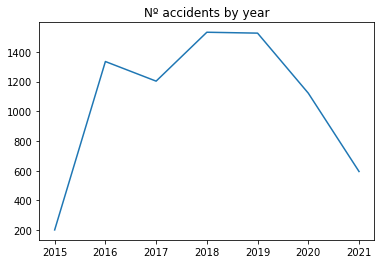

In [10]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

plt.plot(year_df['Año'], year_df['Codigo accidentado'])
plt.title('Nº accidents by year')
pyplot.show()


In [11]:

year_df = accidentabilidad[['Año','Codigo accidentado', 'Tipo accidente']]
year_df = year_df.reset_index()

year_df.drop(columns={'index'}, inplace=True)

In [12]:
year_df['Año'] = year_df['Año'].fillna(0).apply(int)

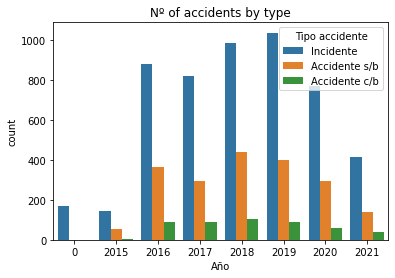

In [13]:
import seaborn as sns


ax = sns.countplot(x="Año", hue = 'Tipo accidente', data=year_df)
ax.set_title('Nº of accidents by type')
plt.show()

On the above chart we can observe clearly an ascending tendency until 2019. From 2019 to present the accidents start to descent greatly.

We are going to check the tendency over the years with the nº people involved in each accident

In [14]:
people_involved = accidentabilidad[['Año', 'Numero personas implicadas']]
people_involved


,Año,Numero personas implicadas
0,2016.0,0
1,2016.0,0
2,2016.0,0
3,2016.0,0
4,2016.0,0
...,...,...
7792,2021.0,1
7793,2021.0,1
7794,2021.0,1
7795,2021.0,1


In [15]:
people_involved['Año'] = people_involved['Año'].fillna(0).apply(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
people_involved = people_involved.groupby('Año').agg('sum')

In [17]:
people_involved = people_involved.reset_index()
people_involved.sort_values('Numero personas implicadas', ascending=False)

,Año,Numero personas implicadas
4,2018,854389
6,2020,351529
7,2021,40878
5,2019,1590
3,2017,310
0,0,164
2,2016,63
1,2015,32


In [18]:
x = people_involved['Año'].astype(str)
y = people_involved['Numero personas implicadas']

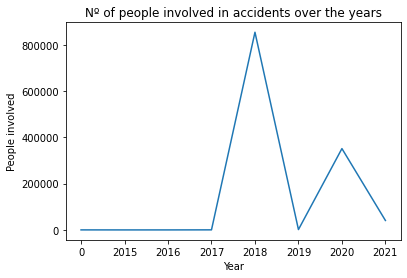

In [19]:
plt.plot(x,y)
plt.title('Nº of people involved in accidents over the years')
plt.xlabel('Year')
plt.ylabel('People involved')

plt.show()

In [20]:
n_accidents = year_df.groupby('Año').agg('count')
n_accidents.drop(columns={'Tipo accidente'},inplace=True)

In [21]:
n_accidents.rename(columns={'Codigo accidentado':'Count'}, inplace=True)

In [22]:
n_accidents = n_accidents.reset_index()
n_accidents.head()

,Año,Count
0,0,282
1,2015,202
2,2016,1335
3,2017,1203
4,2018,1532


In [23]:
x2= n_accidents['Año'].astype(str)
y2=n_accidents['Count'].astype(int)

As we can see on the charts before the number of accidents has been more stable than the number of accidents. It seems that although the nº of accidents in 2019 has suffered a huge decrease on the nº of accidents the number of people involved in a accident has been stable comparing to 2018 where we can see a peek on the nº

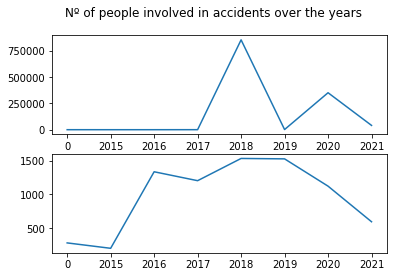

In [24]:


fig, axs = plt.subplots(2)
fig.suptitle('Nº of people involved in accidents over the years')
axs[0].plot(x, y)
axs[1].plot(x2, y2)

Lets check which positions have been involved in an accident


In [25]:

positions = accidentabilidad['Puesto habitual de trabajo'].unique()

positions

array(['Gruista LONGI008', 'Gruistas', 'Gruista LONGI005', ...,
       'Raw Material and Fitter Operator', 'Mechanical Maintenance',
       'press operator '], dtype=object)

In [26]:
len(positions) ##total number of different positions involved in at least one accident


1449

In [27]:
position_df = accidentabilidad[['Codigo accidentado', 'Puesto habitual de trabajo']]
position_df = position_df.groupby(['Puesto habitual de trabajo' ]).agg('count')

In [28]:
position_df = position_df.reset_index()

In [29]:
position_df.rename(columns={'Codigo accidentado':'Count'}, inplace=True)
position_df.head()

,Puesto habitual de trabajo,Count
0,-,1
1,.,3
2,/,1
3,5000-3,1
4,500t Press,7


In [30]:
len(position_df)

1448

In [31]:
sorted_position = position_df.sort_values('Count', ascending=False).head(10)

In [32]:
sorted_position.head() ##carretillero is the position with more accidents

,Puesto habitual de trabajo,Count
190,Carretillero,170
406,Gruista,121
1247,Warehouse,113
1288,carretillero,67
995,Puente Grua - Flejador,51


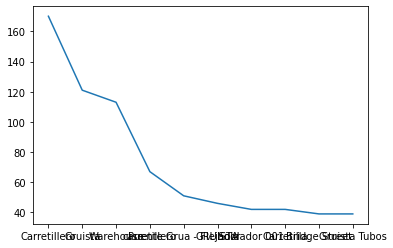

In [33]:
plt.plot(sorted_position['Puesto habitual de trabajo'], sorted_position['Count'])
plt.show()

On the chart before we can see there are a big diference in number of accidents between the first 5 position, let plot those:

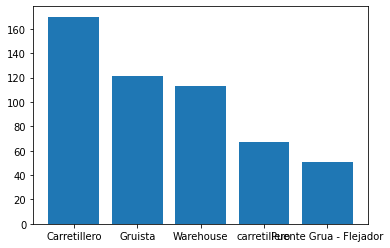

In [34]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = sorted_position['Puesto habitual de trabajo'].head(5)
y = sorted_position['Count'].head(5)

plt.bar(x,y)

plt.show()

Now we are going to analyze the type of people which has had the accidents. For that purpose we will create a new df with the relevant columns to this analysis.

We dont have data for all accidents so we will analyze the ones we have

In [35]:
empleado = accidentabilidad[['Edad', 'Género', 'Codigo accidentado']]

empleado.head()

,Edad,Género,Codigo accidentado
0,NaN,NaN,HS-BRGS_0001
1,NaN,NaN,HS-BRGS_0010
2,NaN,NaN,HS-BRGS_0011
3,NaN,NaN,HS-BRGS_0012
4,NaN,NaN,HS-BRGS_0013


In [36]:
empleado = empleado[(empleado['Edad'].isnull() == False) & (empleado['Género'].isnull() == False)]

empleado.head()

,Edad,Género,Codigo accidentado
1411,48,Hombre,HS-TRRG_1495
1423,32,Hombre,HS-BRGS_1507
1485,44,Hombre,HS-NVRR_1589
1513,33,Hombre,HS-TRRG_1617
1578,45,Hombre,HS-NVRR_1942


In [37]:
empleado.groupby(['Edad', 'Género']).agg('count')

Codigo accidentado
Edad         Género                    
*            Hombre                  10
-            Hombre                  14
             Mujer                    2
---          Mujer                    1
.            Hombre                   3
...                                 ...
na           Hombre                   1
none         Hombre                   6
se desconoce Hombre                   1
unknown      Hombre                   2
x            Hombre                   2

[139 rows x 1 columns]

In [38]:
## we get only numeric values or unknow for edad

empleado['Edad'] = empleado['Edad'].apply(lambda x: x if x.isnumeric() else 'unknown')

In [39]:
empleado_grouped = empleado.groupby(['Edad', 'Género']).agg('count')

In [40]:
empleado_grouped.head()

,,Codigo accidentado
Edad,Género,
10,Hombre,1
100,Hombre,13
17,Hombre,3
18,Hombre,4
19,Hombre,13


In [41]:
empleado_grouped = empleado_grouped.sort_values('Codigo accidentado', ascending=False).reset_index()


In [42]:
empleado_grouped.head()

,Edad,Género,Codigo accidentado
0,40,Hombre,129
1,35,Hombre,120
2,unknown,Hombre,99
3,45,Hombre,99
4,30,Hombre,86


In [43]:
empleado = empleado.reset_index()

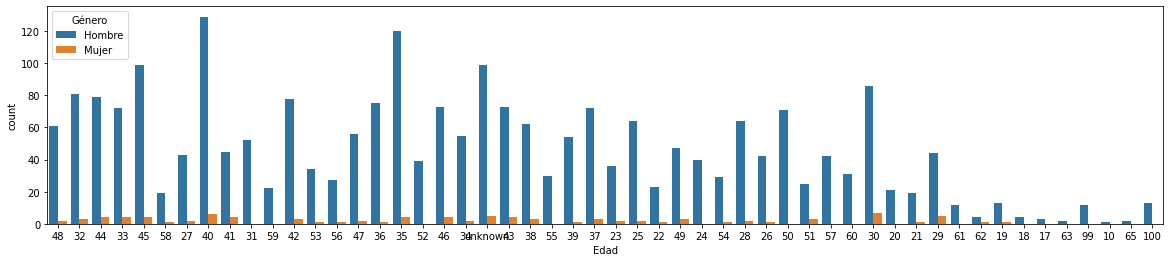

In [44]:
plt.figure(figsize=(20,4))
ax.set_title('Nº workers involved in an accident by gender and age')
ax = sns.countplot(x="Edad", hue="Género", data=empleado)


At first sight we can see men have a lot more accidents than women. 40 years old men are the more target group. To see % rates we will need to compare with the Staff table.


Now lets check the number of accidents by turn

In [45]:
turno = accidentabilidad[['Codigo accidentado', 'Turno']]
turno = turno[turno['Turno'].isnull()==False]

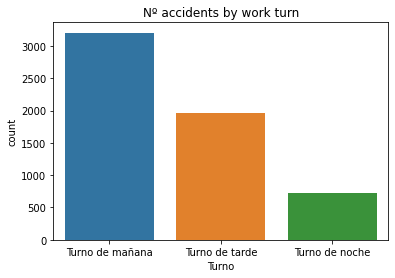

In [46]:

ax = sns.countplot(x="Turno",  data=turno)
ax.set_title('Nº accidents by work turn')
plt.show()

This might be unexpected but the turn with more accidentes is the morning one, lets analyze the severity of the accidents in those turns

In [47]:
turno = accidentabilidad[['Codigo accidentado', 'Turno', 'Gravedad potencial']]
turno = turno.reset_index()

turno = turno[turno['Gravedad potencial'].isnull()==False]

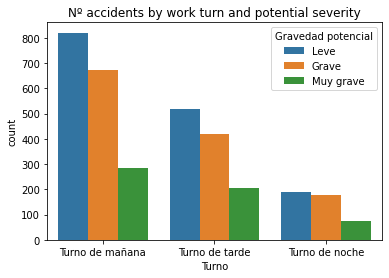

In [48]:
ax = sns.countplot(x="Turno", hue = 'Gravedad potencial', data=turno)
ax.set_title('Nº accidents by work turn and potential severity')
plt.show()

Morning turn keeps being the one with more severe accidents

Now we are going to get the nº of accidents by severity and location

In [49]:
plant = accidentabilidad[['Planta', 'Codigo accidentado', 'Gravedad potencial']]

In [50]:
len(plant['Planta'].unique()) ## we have 39 plants

39

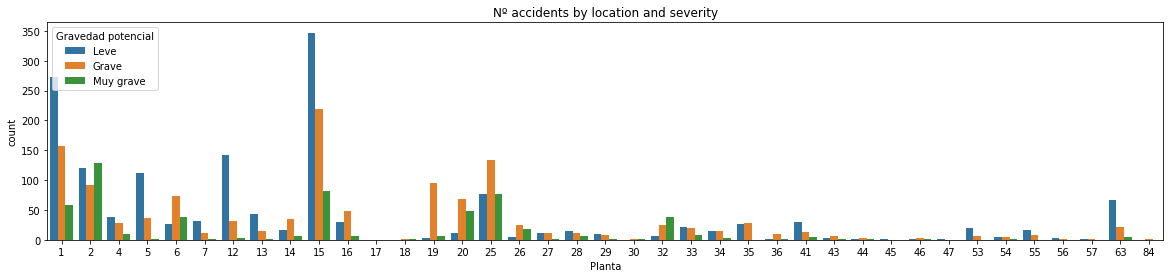

In [51]:
plt.figure(figsize=(20,4))
ax = sns.countplot(x="Planta", hue = 'Gravedad potencial', data=plant)
ax.set_title('Nº accidents by location and severity')
plt.show()

We are going to upload the plants table with its location and type of technology

In [52]:
! cp /content/drive/MyDrive/'Colab Notebooks'/'TFM Accidentabilidad'/Data/'G_Plantas y Tech'.csv .

In [53]:
plants_catalog = pd.read_csv('G_Plantas y Tech.csv', sep=';')

In [54]:
plants_catalog.head()

,ID,Fabrica,Activo,Tecnología
0,1,Argentina,1,Blanking
1,2,Argentina,1,Corte Longitudinal
2,3,Argentina,1,Corte Transversal
3,4,Arizona,1,Células Soldadura
4,5,Arizona,1,Corte Láser


Each fabric is classified by the location and its technology. We have the following locations

In [55]:
plants_catalog['Fabrica'].unique()

array(['Argentina', 'Arizona', 'Barcelona', 'Burgos', 'Campinas', 'Czech',
       'Galicia', 'Gonvauto Asturias', 'Gonvauto Barcelona', 'Dongguan',
       'Hiasa', 'Kaluga', 'Laser Brandenburg', 'Loudi', 'Navarra',
       'Paraná', 'Polska', 'Portugal', 'Puebla', 'South Carolina',
       'Tarragona', 'Thüringen', 'Valencia', 'Union Street',
       'Laser Barcelona', 'Laser Valencia', 'Baja California', 'Çepas',
       'Colombia', 'Senica', 'Gonvvama Holding', 'Changshu', 'Shenyang',
       'Chongqing', 'GCF', 'Bridge Street', 'Newton Aycliffe',
       'Popes Lane', 'Darlaston', 'Cannock', 'Flinsa', 'Nitra'],
      dtype=object)

and the following types of tecnologies

In [56]:
plants_catalog['Tecnología'].unique()

array(['Blanking', 'Corte Longitudinal', 'Corte Transversal',
       'Células Soldadura', 'Corte Láser', 'Tubos', 'Cizalla',
       'Electrozincado', 'Galvanizado continuo', 'Skinpass', 'Decapado',
       'Laminado', 'Recocido', 'Prensa', 'Corte Láser 3D', 'Sierra',
       'Maquinaria Auxiliar', 'Aplanadora', 'Corte Plasma',
       'Galvanizado Inmersión', 'Perfilado de barrera y postes',
       'Perfiles abiertos', 'Perforado', 'Pintura', 'Punzonado',
       'Ablación', 'Tailor Welding', 'Limpieza/Prepintado',
       'Plastificado', 'Oficinas administrativas',
       'Almacén de Materia Prima', 'Almacén de Producto Terminado',
       'Almacén producto semielaborado o en producción',
       'Área de embalado', 'Instalaciones exteriores y auxiliares',
       'Mantenimiento', 'Puente Grúa', 'Carpinteria',
       'Almacen de recambios', 'Almacen productos quimicos',
       'Residuos productos quimicos', 'Carretilla', 'Coil to Coil',
       'Soldadura Manual', 'General / Auxiliar', 'Galvan

Lets join this information now to our accidents plant table

In [57]:
plant = plant.merge(plants_catalog, left_on='Planta', right_on='ID', how='left')
plant

,Planta,Codigo accidentado,Gravedad potencial,ID,Fabrica,Activo,Tecnología
0,2,HS-BRGS_0001,NaN,2,Argentina,1,Corte Longitudinal
1,2,HS-BRGS_0010,NaN,2,Argentina,1,Corte Longitudinal
2,2,HS-BRGS_0011,NaN,2,Argentina,1,Corte Longitudinal
3,2,HS-BRGS_0012,NaN,2,Argentina,1,Corte Longitudinal
4,2,HS-BRGS_0013,NaN,2,Argentina,1,Corte Longitudinal
...,...,...,...,...,...,...,...
7792,36,HS-CMPS_10763,NaN,36,Dongguan,1,Blanking
7793,2,HS-BRGS_10764,NaN,2,Argentina,1,Corte Longitudinal
7794,20,HS-CLMB_10765,NaN,20,Burgos,1,Skinpass
7795,5,HS-VLNC_10766,NaN,5,Arizona,1,Corte Láser


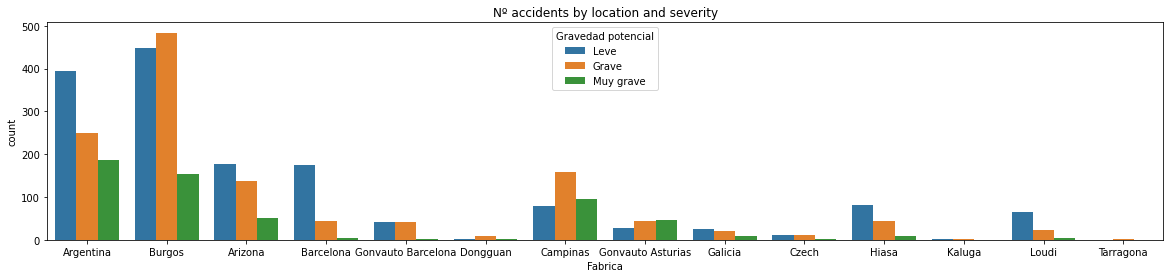

In [58]:
plt.figure(figsize=(20,4)) 
ax = sns.countplot(x="Fabrica", hue = 'Gravedad potencial', data=plant)
ax.set_title('Nº accidents by location and severity')
plt.show()

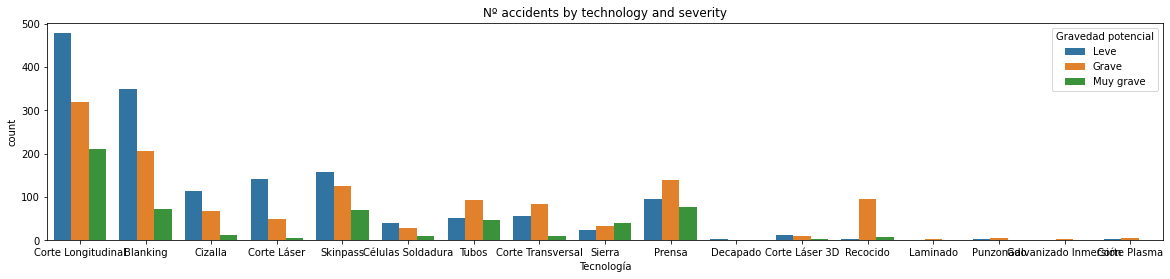

In [59]:
plt.figure(figsize=(20,4)) 
ax = sns.countplot(x="Tecnología", hue = 'Gravedad potencial', data=plant)
ax.set_title('Nº accidents by technology and severity')
plt.show()

In [60]:
plant = plant.reset_index()

In [61]:
plant.head()

,index,Planta,Codigo accidentado,Gravedad potencial,ID,Fabrica,Activo,Tecnología
0,0,2,HS-BRGS_0001,NaN,2,Argentina,1,Corte Longitudinal
1,1,2,HS-BRGS_0010,NaN,2,Argentina,1,Corte Longitudinal
2,2,2,HS-BRGS_0011,NaN,2,Argentina,1,Corte Longitudinal
3,3,2,HS-BRGS_0012,NaN,2,Argentina,1,Corte Longitudinal
4,4,2,HS-BRGS_0013,NaN,2,Argentina,1,Corte Longitudinal
...,...,...,...,...,...,...,...,...
7792,7792,36,HS-CMPS_10763,NaN,36,Dongguan,1,Blanking
7793,7793,2,HS-BRGS_10764,NaN,2,Argentina,1,Corte Longitudinal
7794,7794,20,HS-CLMB_10765,NaN,20,Burgos,1,Skinpass
7795,7795,5,HS-VLNC_10766,NaN,5,Arizona,1,Corte Láser


In [62]:
plant_grouped = plant.groupby(['Fabrica','Gravedad potencial']).agg('count').sort_values('index', ascending=False)
plant_grouped.head()

index  Planta  ...  Activo  Tecnología
Fabrica            Gravedad potencial                 ...                    
Burgos             Grave                 484     484  ...     484         484
                   Leve                  449     449  ...     449         449
Argentina          Leve                  394     394  ...     394         394
                   Grave                 249     249  ...     249         249
                   Muy grave             187     187  ...     187         187
Arizona            Leve                  178     178  ...     178         178
Barcelona          Leve                  174     174  ...     174         174
Campinas           Grave                 158     158  ...     158         158
Burgos             Muy grave             153     153  ...     153         153
Arizona            Grave                 138     138  ...     138         138
Campinas           Muy grave              95      95  ...      95          95
Hiasa              Leve                   81      81  ...      81          81
Campinas           Leve                   80      80  ...      80          80
Loudi              Leve                   66      66  ...      66          66
Arizona            Muy grave              50      50  ...      50          50
Gonvauto Asturias  Muy grave              47      47  ...      47          47
Hiasa              Grave                  45      45  ...      45          45
Gonvauto Asturias  Grave                  44      44  ...      44          44
Barcelona          Grave                  43      43  ...      43          43
Gonvauto Barcelona Grave                  42      42  ...      42          42
                   Leve                   41      41  ...      41          41
Gonvauto Asturias  Leve                   28      28  ...      28          28
Galicia            Leve                   25      25  ...      25          25
Loudi              Grave                  22      22  ...      22          22
Galicia            Grave                  21      21  ...      21          21
Czech              Leve                   12      12  ...      12          12
                   Grave                  11      11  ...      11          11
Dongguan           Grave                  10      10  ...      10          10
Hiasa              Muy grave              10      10  ...      10          10
Galicia            Muy grave               9       9  ...       9           9
Barcelona          Muy grave               5       5  ...       5           5
Loudi              Muy grave               5       5  ...       5           5
Gonvauto Barcelona Muy grave               3       3  ...       3           3
Kaluga             Leve                    2       2  ...       2           2
Dongguan           Leve                    2       2  ...       2           2
                   Muy grave               2       2  ...       2           2
Czech              Muy grave               2       2  ...       2           2
Kaluga             Grave                   1       1  ...       1           1
Tarragona          Grave                   1       1  ...       1           1

[39 rows x 6 columns]

In [63]:
plant_grouped = plant_grouped.reset_index().head(10)

In [64]:
plant_grouped

,Fabrica,Gravedad potencial,index,Planta,Codigo accidentado,ID,Activo,Tecnología
0,Burgos,Grave,484,484,484,484,484,484
1,Burgos,Leve,449,449,449,449,449,449
2,Argentina,Leve,394,394,394,394,394,394
3,Argentina,Grave,249,249,249,249,249,249
4,Argentina,Muy grave,187,187,187,187,187,187
5,Arizona,Leve,178,178,178,178,178,178
6,Barcelona,Leve,174,174,174,174,174,174
7,Campinas,Grave,158,158,158,158,158,158
8,Burgos,Muy grave,153,153,153,153,153,153
9,Arizona,Grave,138,138,138,138,138,138


Burgos is the location with more accidents over all years, with a total of 484, followed by the Argentina plant with 449

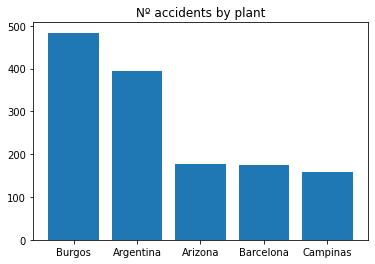

In [65]:
x = plant_grouped['Fabrica']
y = plant_grouped['index']

plt.bar(x,y)
plt.title('Nº accidents by plant')
plt.show()


We are going to analyze now the number of lost workdays by plant and if the norms were meet or not

In [66]:
normativa = accidentabilidad[['Planta', 'Año', 'Se habian cumplido las normas establecidas, en caso de estar definidas', 'Jornadas laborales perdidas']]

In [67]:
normativa['Año'] = normativa['Año'].fillna(0).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
normativa.rename(columns={'Se habian cumplido las normas establecidas, en caso de estar definidas': 'Norma'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [69]:
normativa = normativa.merge(plants_catalog, left_on='Planta', right_on='ID', how='inner')
normativa.head()

,Planta,Año,Norma,Jornadas laborales perdidas,ID,Fabrica,Activo,Tecnología
0,2,2016,NaN,NaN,2,Argentina,1,Corte Longitudinal
1,2,2016,NaN,NaN,2,Argentina,1,Corte Longitudinal
2,2,2016,NaN,NaN,2,Argentina,1,Corte Longitudinal
3,2,2016,NaN,0.0,2,Argentina,1,Corte Longitudinal
4,2,2016,NaN,NaN,2,Argentina,1,Corte Longitudinal


In [70]:
len(normativa.Fabrica.unique())

14

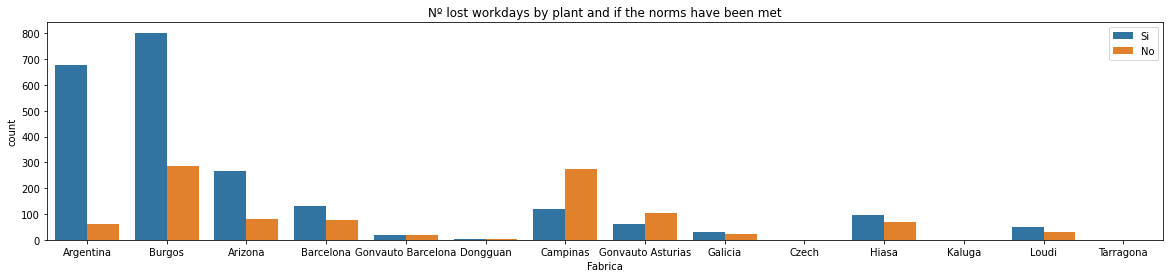

In [71]:
plt.figure(figsize=(20,4)) 
ax = sns.countplot(x="Fabrica", hue = 'Norma', data=normativa)
plt.legend(loc='upper right')
ax.set_title('Nº lost workdays by plant and if the norms have been met')
plt.show()

In [72]:
accidentabilidad.columns

Index(['ID', '-  DATOS DEL SUCESO -', 'Codigo accidentado',
       'Fecha introduccion datos', 'Fecha accidente', 'Año',
       'Codigo fecha accidente', 'Planta', 'Código empleado', 'Supervisor',
       ...
       '- PROPUESTA INICIAL DE MEDIDAS A PLANIFICAR -',
       'Medida a planificar 1', 'Medida a planificar 2',
       'Medida a planificar 3', 'Notificacion o investigacion',
       'Modifica notificacion',
       'Se ha dado un suceso similar (en cuanto a sus causas y consecuencias) en el último año en planta?',
       'En caso afirmativo, cual es y como se actuó?', 'Tipo Tema',
       'Acta reunión alta baja'],
      dtype='object', length=106)

### Accident Index calculation

Accident index = Nº accidents / Nº employees

In [74]:
# we come back to our dataframe with the accidents code per year and its accident type
year_df.head()

,Año,Codigo accidentado,Tipo accidente
0,2016,HS-BRGS_0001,Incidente
1,2016,HS-BRGS_0010,Incidente
2,2016,HS-BRGS_0011,Incidente
3,2016,HS-BRGS_0012,Incidente
4,2016,HS-BRGS_0013,Incidente


In [80]:
total_accidents = year_df.groupby('Año').agg('count')
total_accidents.drop(columns={'Tipo accidente'}, inplace=True)
total_accidents.rename(columns={'Codigo accidentado':'Nº accidents'}, inplace=True)



total_accidents.head()

,Nº accidents
Año,
0,282
2015,202
2016,1335
2017,1203
2018,1532


In [81]:
total_accidents = total_accidents.reset_index()

In [117]:
# we are going to upload the staff data in order to calculate the accident rate for each year of study

! cp /content/drive/MyDrive/'Colab Notebooks'/'TFM Accidentabilidad'/Data/Datos_plantilla.xlsx .


employees_country = pd.read_excel('Datos_plantilla.xlsx',sheet_name='tipo_empleados_pais')
employees_country.head()

,Año,País,Tipo contrato,Empleados
0,2018,México,Interno,154
1,2018,México,Externo,61
2,2018,EEUU,Interno,105
3,2018,EEUU,Externo,0
4,2018,Colombia,Interno,243


In [118]:
total_employees = employees_country.groupby('Año').agg('sum')
total_employees = total_employees.reset_index()
total_employees.head()

,Año,Empleados
0,2017,4872
1,2018,5357
2,2019,5268


In [119]:
accident_index = total_accidents.merge(total_employees, how='inner', on='Año')
accident_index

,Año,Nº accidents,Empleados
0,2017,1203,4872
1,2018,1532,5357
2,2019,1526,5268


In [120]:
accident_index = accident_index.fillna(0)
accident_index

,Año,Nº accidents,Empleados
0,2017,1203,4872
1,2018,1532,5357
2,2019,1526,5268


In [121]:
accident_index['Index'] = round(accident_index['Nº accidents'] / accident_index['Empleados'] * 100,2)

In [122]:
accident_index['Año'] = accident_index['Año'].astype(str)

In [123]:
accident_index

,Año,Nº accidents,Empleados,Index
0,2017,1203,4872,24.69
1,2018,1532,5357,28.60
2,2019,1526,5268,28.97


On the charts below we can see that the accident rate has increased during past years, so the company has failed to decrease it with its measures

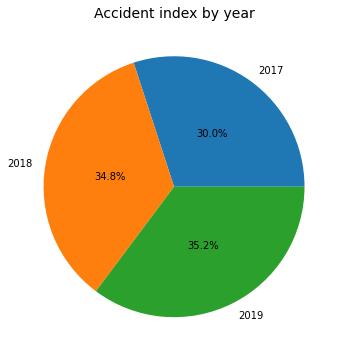

In [127]:
pie, ax = plt.subplots(figsize=[10,6])
labels = accident_index['Año']
plt.pie(x=accident_index['Index'], autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Accident index by year", fontsize=14);

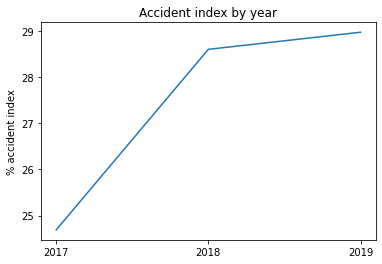

In [129]:
plt.plot(accident_index['Año'], accident_index['Index'])
plt.title('Accident index by year')
plt.ylabel('% accident index')
plt.show()

Lets analyze the index by the severity of the accidents

In [147]:
severity_year = accidentabilidad[['Gravedad potencial', 'Año', 'Codigo accidentado']]
severity_year = severity_year.groupby(['Año', 'Gravedad potencial']).agg('count')
severity_year = severity_year.reset_index()
severity_year['Año'] = severity_year['Año'].astype(int).astype(str)
severity_year.rename(columns={'Codigo accidentado':'N accidents'}, inplace=True)
severity_year.head()

,Año,Gravedad potencial,N accidents
0,2016,Leve,1
1,2017,Grave,68
2,2017,Leve,111
3,2017,Muy grave,14
4,2018,Grave,593


In [151]:
severity_year.head()

,Año,Gravedad potencial,N accidents
0,2016,Leve,1
1,2017,Grave,68
2,2017,Leve,111
3,2017,Muy grave,14
4,2018,Grave,593


As we only have data until 2019 to calculate the accident rate we can't see the evolution of the index at the moment and it is increasing until 2019. 

On the chart below we can see how the number of accidents decrease noticeably, this could be caused by Covid-19 situation in all countries as fabrics were stopped by the regulation so several workers stayed at home during a long period of time in 2020. Seeing this data we expect the accident index to decrease in 2020.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


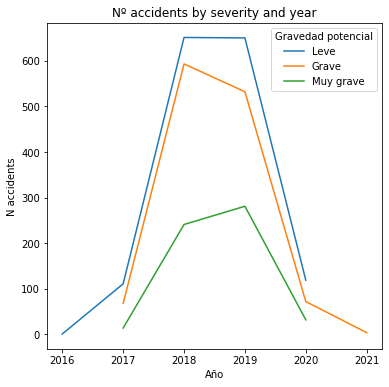

In [156]:
plt.figure(figsize=(6,6))
plt.title('Nº accidents by severity and year')


sns.lineplot(severity_year['Año'], severity_year['N accidents'], hue=severity_year['Gravedad potencial'])

plt.show()

### Matriz correlacion
Matriz correlación : Pasar numericos y meter las columnas a comparar

correlation_mat = df_small.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

In [229]:
accidentes = accidentabilidad[['Codigo accidentado', 'Planta', 'Puesto habitual de trabajo',
       'Género', 'Turno', 'Línea de producción']]

In [230]:
accidentes.columns

Index(['Codigo accidentado', 'Planta', 'Puesto habitual de trabajo', 'Género',
       'Turno', 'Línea de producción'],
      dtype='object')

In [231]:
accidentes = accidentes.groupby(['Planta', 'Puesto habitual de trabajo',
       'Género', 'Turno', 'Línea de producción']).agg('count')

In [242]:
accidentes = accidentes.reset_index()
accidentes.rename(columns={'Codigo accidentado':'N accidentes'}, inplace= True)
accidentes.head()

,index,Planta,Puesto habitual de trabajo,Género,Turno,Línea de producción,N accidentes,turno_code,Puesto habitual de trabajo_code,Género_code,Línea de producción_code
0,0,1,AUXILIAR TRANS 4,Hombre,Turno de tarde,TRANS004,1,2.0,4.0,0.0,55.0
1,1,1,Auxiliar Trans 4,Mujer,Turno de mañana,TRANS004,1,0.0,24.0,1.0,55.0
2,2,1,Ayudante LCL,Hombre,Turno de tarde,LONGI003,1,2.0,30.0,0.0,21.0
3,3,1,CIZALLA,Hombre,Turno de tarde,CIZAL001,1,2.0,43.0,0.0,7.0
4,4,1,Calidad,Hombre,Turno de tarde,ZINCA001,1,2.0,45.0,0.0,64.0


In [247]:
accidentes.sort_values('N accidentes', ascending=False)

,index,Planta,Puesto habitual de trabajo,Género,Turno,Línea de producción,N accidentes,turno_code,Puesto habitual de trabajo_code,Género_code,Línea de producción_code
192,192,6,Operador de Embalagem,Hombre,Turno de tarde,LONGI006,5,2.0,264.0,0.0,24.0
259,259,15,GRUISTA,Hombre,Turno de mañana,GALVA001,4,0.0,98.0,0.0,11.0
274,274,15,Gruista,Hombre,Turno de tarde,GALVA001,4,2.0,105.0,0.0,11.0
264,264,15,Gruista,Hombre,Turno de mañana,GALVA001,4,0.0,105.0,0.0,11.0
187,187,6,Operador de Embalagem,Hombre,Turno de mañana,LONGI004,4,0.0,264.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...
159,159,5,Ninguno de los implicados desempeñaban funcion...,Hombre,Turno de mañana,LONGI002,1,0.0,243.0,0.0,20.0
158,158,5,Montador/auxiliar LONGI003,Hombre,Turno de noche,LONGI003,1,1.0,241.0,0.0,21.0
157,157,5,Montador/auxiliar,Hombre,Turno de tarde,LONGI001,1,2.0,240.0,0.0,19.0
156,156,5,Montador/Ayudante,Hombre,Turno de noche,LONGI003,1,1.0,238.0,0.0,21.0


In [233]:
len(accidentes)

489

In [234]:
#cleaning null values, there aren't any after groupingby

accidentes[accidentes.isnull().any(axis=1)]


,Planta,Puesto habitual de trabajo,Género,Turno,Línea de producción,Codigo accidentado


In [235]:
## we are going to transform our categorical data using the sklearn approach: the Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
accidentes["turno_code"] = ord_enc.fit_transform(accidentes[["Turno"]])
accidentes[["turno_code", "Turno"]].head()

,turno_code,Turno
0,2.0,Turno de tarde
1,0.0,Turno de mañana
2,2.0,Turno de tarde
3,2.0,Turno de tarde
4,2.0,Turno de tarde


In [236]:
col_transform = ['Puesto habitual de trabajo','Género','Línea de producción']

In [237]:
for col in col_transform:
  ord_enc = OrdinalEncoder()
  accidentes[col + "_code"] = ord_enc.fit_transform(accidentes[[col]])


In [238]:
accidentes.head()

,Planta,Puesto habitual de trabajo,Género,Turno,Línea de producción,Codigo accidentado,turno_code,Puesto habitual de trabajo_code,Género_code,Línea de producción_code
0,1,AUXILIAR TRANS 4,Hombre,Turno de tarde,TRANS004,1,2.0,4.0,0.0,55.0
1,1,Auxiliar Trans 4,Mujer,Turno de mañana,TRANS004,1,0.0,24.0,1.0,55.0
2,1,Ayudante LCL,Hombre,Turno de tarde,LONGI003,1,2.0,30.0,0.0,21.0
3,1,CIZALLA,Hombre,Turno de tarde,CIZAL001,1,2.0,43.0,0.0,7.0
4,1,Calidad,Hombre,Turno de tarde,ZINCA001,1,2.0,45.0,0.0,64.0


In [241]:
accidentes.columns

Index(['Planta', 'Puesto habitual de trabajo', 'Género', 'Turno',
       'Línea de producción', 'Codigo accidentado', 'turno_code',
       'Puesto habitual de trabajo_code', 'Género_code',
       'Línea de producción_code'],
      dtype='object')

In [244]:
accidents_coded = accidentes[['turno_code',
       'Puesto habitual de trabajo_code', 'Género_code',
       'Línea de producción_code','Planta','N accidentes']]

accidents_coded.head()

,turno_code,Puesto habitual de trabajo_code,Género_code,Línea de producción_code,Planta,N accidentes
0,2.0,4.0,0.0,55.0,1,1
1,0.0,24.0,1.0,55.0,1,1
2,2.0,30.0,0.0,21.0,1,1
3,2.0,43.0,0.0,7.0,1,1
4,2.0,45.0,0.0,64.0,1,1


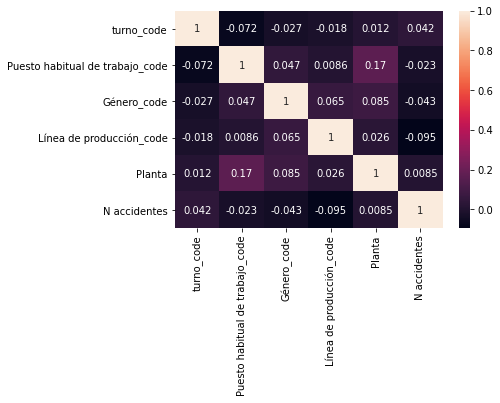

In [245]:
correlation_mat = accidents_coded.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

In [248]:
accidents_coded_srtd = accidentes[['turno_code',
        'Género_code','Planta','N accidentes']]

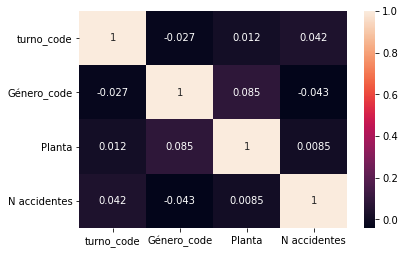

In [249]:
correlation_mat = accidents_coded_srtd.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()